   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        0  
1      9.8        0  
2      9.8        0 

C:\Users\vaish\anaconda3\new\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vaish\anaconda3\new\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vaish\anaconda3\new\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


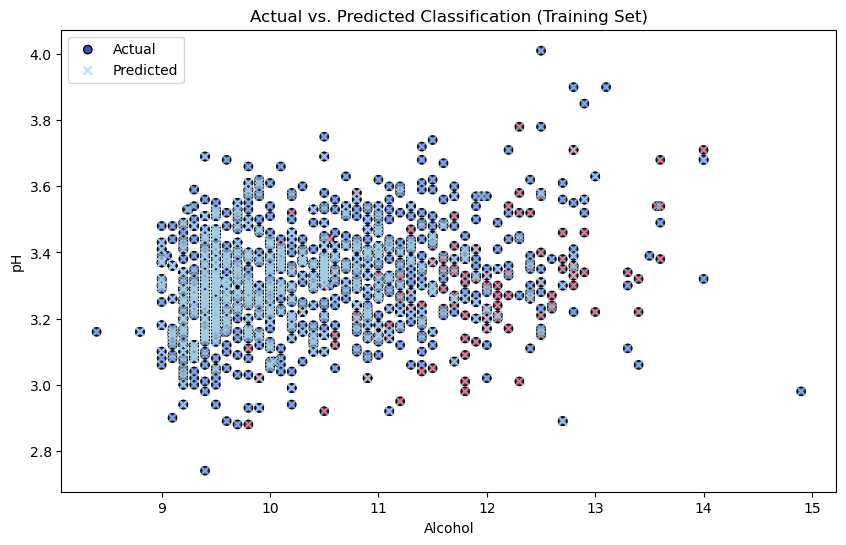

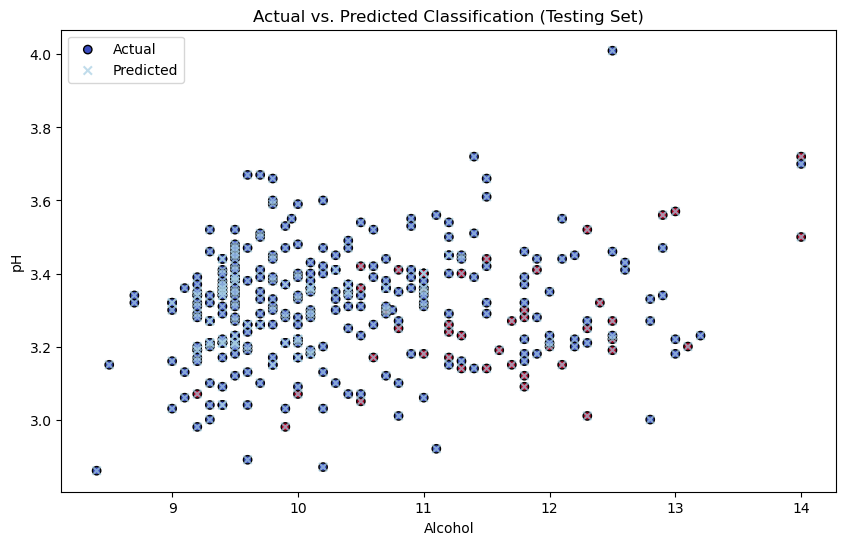

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score




file_path = "C:/Users/vaish/Downloads/archive (1)/winequality-red.csv"
data = pd.read_csv(file_path)


data['quality'] = data['quality'].apply(lambda x: 1 if x >= 7 else 0)


print(data.head())

print(data.isnull().sum())


features = ['alcohol', 'pH']
X = data[features]
y = data['quality']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model = SVC(kernel='linear', probability=True, random_state=42)
model.fit(X_train_scaled, y_train)


y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)
y_test_prob = model.predict_proba(X_test_scaled)[:, 1]


conf_matrix = confusion_matrix(y_test, y_test_pred)
class_report = classification_report(y_test, y_test_pred)
roc_auc = roc_auc_score(y_test, y_test_prob)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)
print(f"ROC AUC Score: {roc_auc}")





plt.figure(figsize=(10, 6))
plt.scatter(X_train['alcohol'], X_train['pH'], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k', label='Actual')
plt.scatter(X_train['alcohol'], X_train['pH'], c=y_train_pred, cmap=plt.cm.Paired, marker='x', alpha=0.7, label='Predicted')

plt.xlabel('Alcohol')
plt.ylabel('pH')
plt.title('Actual vs. Predicted Classification (Training Set)')
plt.legend(['Actual', 'Predicted'], loc='upper left')
plt.show()



plt.figure(figsize=(10, 6))
plt.scatter(X_test['alcohol'], X_test['pH'], c=y_test, cmap=plt.cm.coolwarm, edgecolors='k', label='Actual')
plt.scatter(X_test['alcohol'], X_test['pH'], c=y_test_pred, cmap=plt.cm.Paired, marker='x', alpha=0.7, label='Predicted')

plt.xlabel('Alcohol')
plt.ylabel('pH')
plt.title('Actual vs. Predicted Classification (Testing Set)')
plt.legend(['Actual', 'Predicted'], loc='upper left')
plt.show()


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        0  
1      9.8        0  
2      9.8        0 

C:\Users\vaish\anaconda3\new\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vaish\anaconda3\new\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vaish\anaconda3\new\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


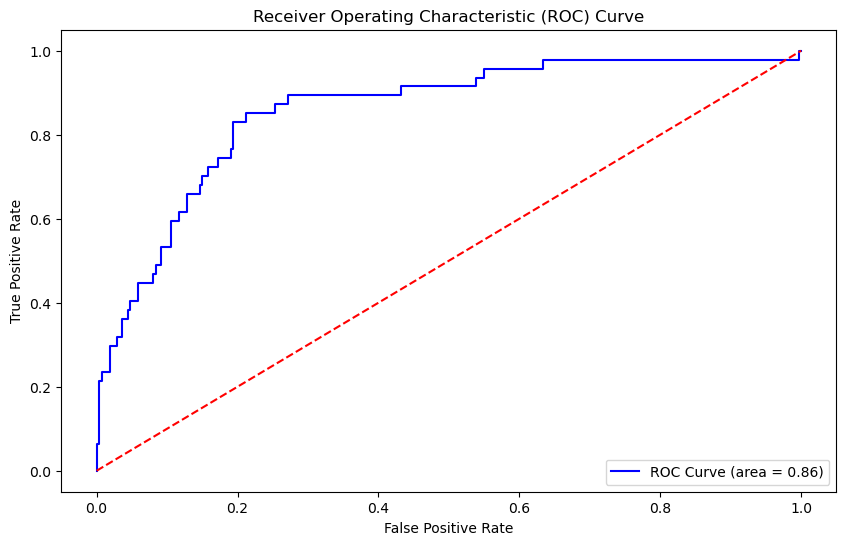

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score



file_path = "C:/Users/vaish/Downloads/archive (1)/winequality-red.csv"
data = pd.read_csv(file_path)



# Convert quality to binary classification: high quality (>= 7) and low quality (< 7)
data['quality'] = data['quality'].apply(lambda x: 1 if x >= 7 else 0)

# Display the first few rows of the dataset
print(data.head())

# Check for missing values
print(data.isnull().sum())

# Separate features and target variable
X = data.drop('quality', axis=1)
y = data['quality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train an SVM model
model = SVC(kernel='linear', probability=True, random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)
y_test_prob = model.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_test_pred)
class_report = classification_report(y_test, y_test_pred)
roc_auc = roc_auc_score(y_test, y_test_prob)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)
print(f"ROC AUC Score: {roc_auc}")

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
